<center><h1>Singh_Avantika_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

##### Name: Avantika Singh
##### Github username: avantikasingh
##### USC ID: 6318290290

### (a) Download Data

Package imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.covariance import EmpiricalCovariance
from tabulate import tabulate
import warnings


Get the Vertebral Column Data Set

### (b) Pre-Processing and Exploratory Data Analysis

In [7]:
column_names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","label"]

df = pd.read_csv("../data/vertebral_column_data/column_2C.dat",names=column_names,delimiter=" ")
#print(df.head())
warnings.filterwarnings('ignore') # to ignore package libraries in output



In [8]:
df["label"] = df["label"].replace(["AB"],1)
df["label"] = df["label"].replace(["NO"],0)

#### i. Scatterplots

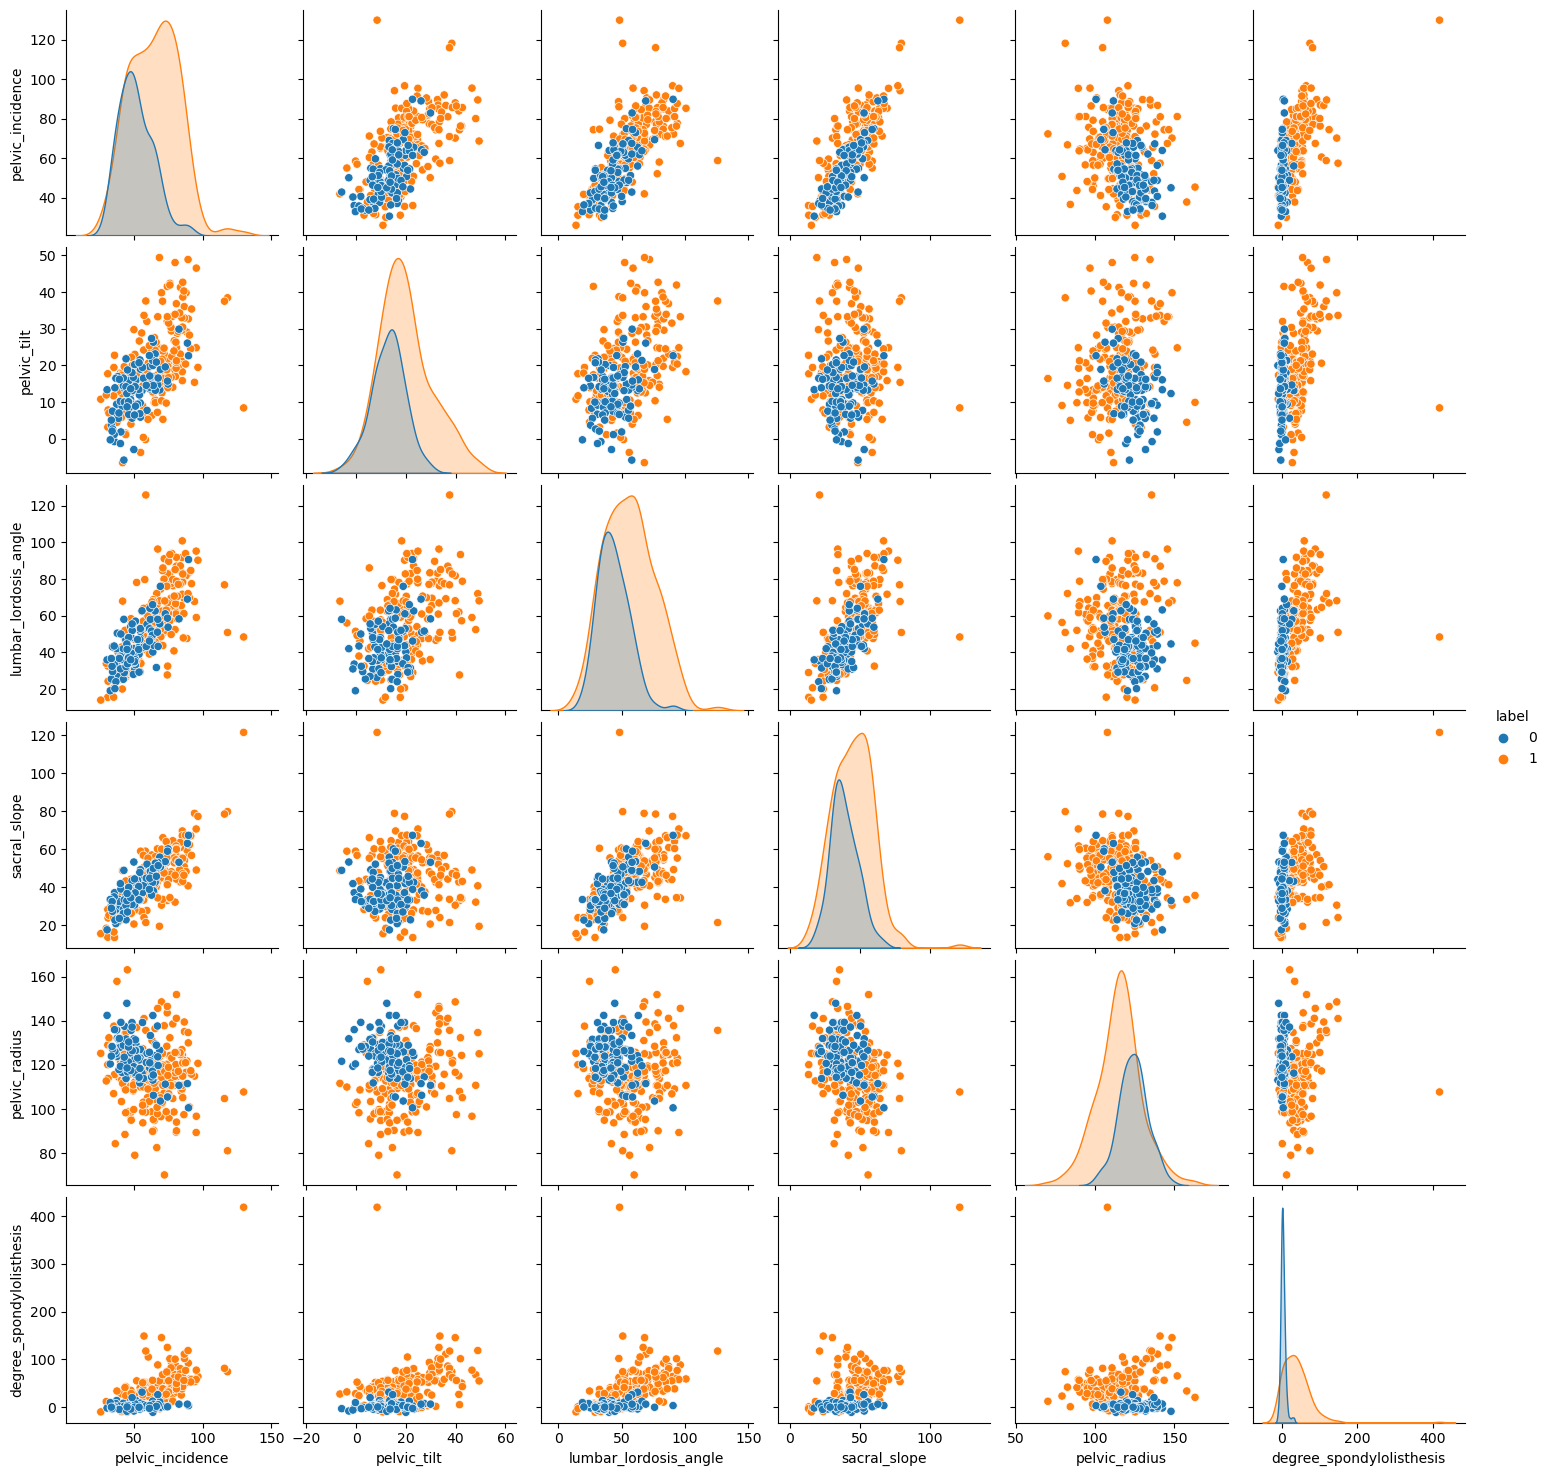

In [9]:
#pd.plotting.scatter_matrix(df)
#sns.set_theme()
sns.pairplot(df,hue="label")

#### ii. Boxplots

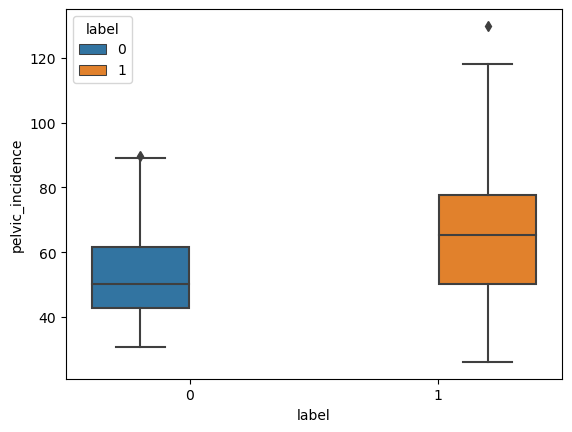

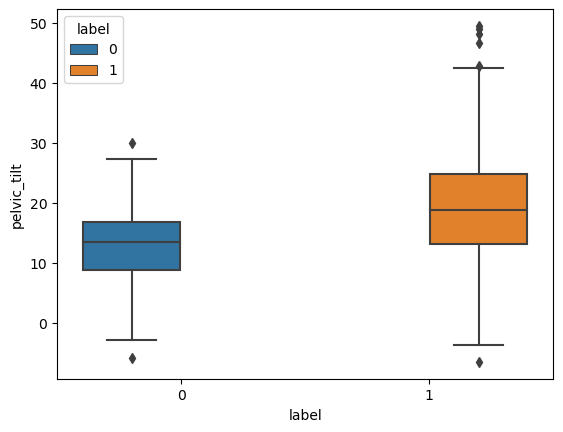

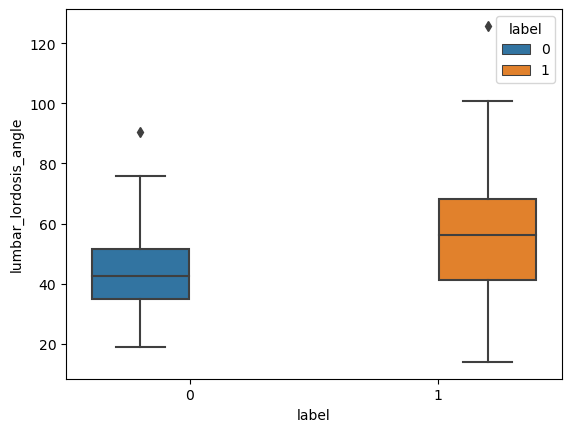

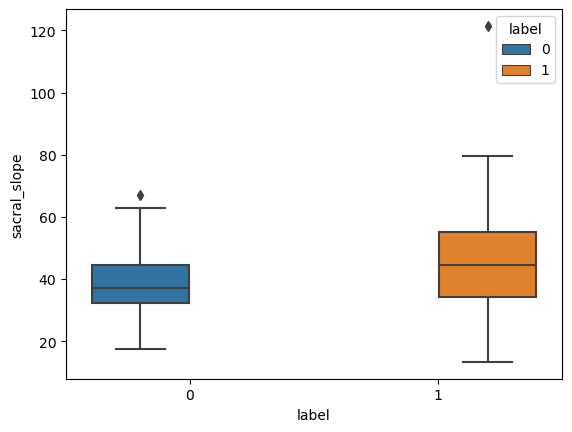

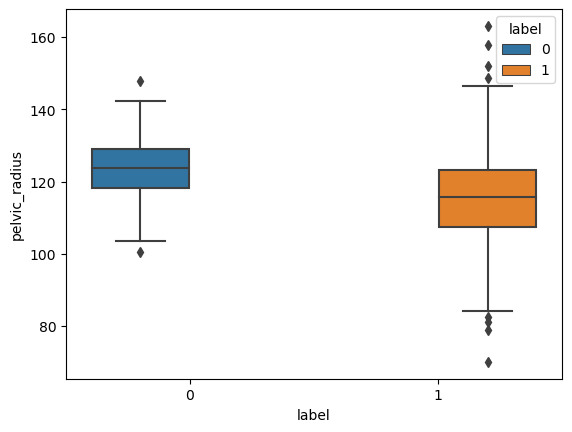

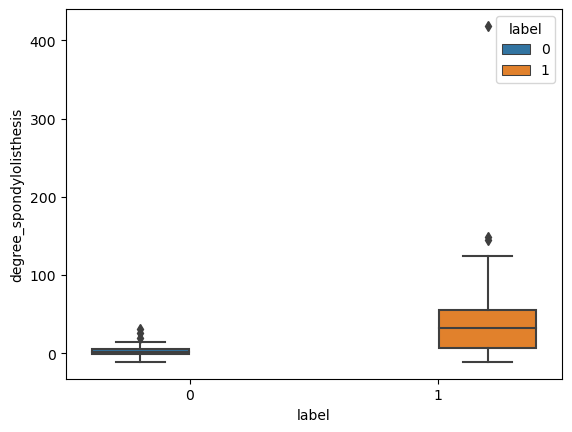

In [10]:
for column in df.columns:
  if column != "label":
    plt.figure()
    sns.boxplot(df,x="label", y= column,hue="label")


#### iii. Split Data Set

In [ ]:
# Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set

df1 = df[df['label'] == 0].head(70)
df2 = df[df['label'] == 1].head(140)
train_set = pd.concat([df1,df2])



# The rest of the data becomes the test set
test_set = df.drop(train_set.index)

# Reset the index for both sets
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)
print(f"Training data shape - {train_set.shape}")
print(f"Test data shape - {test_set.shape}")


### (c) Classification

#### i. Euclidean Metric

In [ ]:
# training features and labels
x_train = train_set.iloc[: ,0: len(train_set.columns) - 1].values
y_train = train_set.iloc[:, len(train_set.columns) -1].values

# testing features and labels
x_test = test_set.iloc[: ,0: len(test_set.columns) - 1].values
y_test = test_set.iloc[:, len(test_set.columns) -1].values

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')


#### ii. Test Data

In [ ]:
#range of k, decreaments of 2
k_list= list(range(208,0,-2))

#lists to store train and test errors
train_error_list = []
test_error_list = []

#variable to store accuracy achieved
best_accuracy = float("-inf")
best_k = None

for k in k_list:

  # create knn classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

  # fit classifier to training data
  knn_classifier.fit(x_train,y_train)

  # make predictions on training and test data
  train_prediction = knn_classifier.predict(x_train)
  test_prediction = knn_classifier.predict(x_test)
  # evaluate train and test errors
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
  train_accuracy = accuracy_score(y_train, train_prediction)
  test_accuracy = accuracy_score(y_test, test_prediction)

  train_error_list.append(1 - train_accuracy)
  test_error_list.append(1 - test_accuracy)

  if test_accuracy > best_accuracy:
    best_accuracy = test_accuracy
    best_k = k

print(f"K* = {best_k}, with an accuracy score of {best_accuracy}")

In [ ]:
# Plot error rate VS k graph

plt.plot(k_list, train_error_list, label="Training Error")
plt.plot(k_list, test_error_list, label="Testing Error")
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Error Rate")
plt.gca().legend()
plt.show()


##### Train classifier with best k*


In [ ]:
classifier_with_best_k = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')

classifier_with_best_k.fit(x_train,y_train)

train_prediction = classifier_with_best_k.predict(x_train)
test_prediction = classifier_with_best_k.predict(x_test)

###### Training Metrices

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, train_prediction)

# Calculate precision, recall, and F1-score
precision = precision_score(y_train, train_prediction)
recall = recall_score(y_train, train_prediction)
f1 = f1_score(y_train, train_prediction)

# Calculate true positive rate (TPR) and true negative rate (TNR)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)


# https://pypi.org/project/tabulate/
table = [["Predicted Class 0", "Predicted Class 1"],
         ["Actual Class 0",cm[0,0],cm[0,1]],
         ["Actual Class 1",cm[1,0],cm[1,1]]]

print(f"Confusion Matrix:")
print(tabulate(table, headers='firstrow', tablefmt='grid'))

table = [['Metric', 'Value'],
         ['True Positive Rate (TPR)',tpr],
         ['True Negative Rate (TNR)',tnr],
         ['Precision',precision],
         ['F1-Score',f1],
         ['Recall',recall]
         ]

print(f"Other Metrices:")
print(tabulate(table, headers='firstrow', tablefmt='grid'))

###### Test Metrices

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, test_prediction)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)
f1 = f1_score(y_test, test_prediction)

# Calculate true positive rate (TPR) and true negative rate (TNR)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)


# https://pypi.org/project/tabulate/
table = [["Predicted Class 0", "Predicted Class 1"],
         ["Actual Class 0",cm[0,0],cm[0,1]],
         ["Actual Class 1",cm[1,0],cm[1,1]]]

print(f"Confusion Matrix:")
print(tabulate(table, headers='firstrow', tablefmt='grid'))

table = [['Metric', 'Value'],
         ['True Positive Rate (TPR)',tpr],
         ['True Negative Rate (TNR)',tnr],
         ['Precision',precision],
         ['F1-Score',f1],
         ['Recall',recall]
         ]

print(f"Other Metrices:")
print(tabulate(table, headers='firstrow', tablefmt='grid'))


#### iii. Learning Curve

In [ ]:
best_test_errors = []
N_values = list(range(10,211,10))
for n in N_values:

  # create subset of training sets
  train_subset_class0 = train_set[train_set['label'] == 0].head(n//3)
  train_subset_class1 = train_set[train_set['label'] == 1].head(n - n//3)

  train_subset = pd.concat([train_subset_class0, train_subset_class1])
  #train_subset.sample(frac=1).reset_index(drop=True)

  # training features and labels
  x_train_subset = train_subset.iloc[: ,0: len(train_subset.columns) - 1].values
  y_train_subset = train_subset.iloc[:, len(train_subset.columns) -1].values

  best_accuracy = float("-inf")
  best_k = 0

  for k in range(1,n+1,5):

    # create knn classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # fit classifier to training data
    knn_classifier.fit(x_train_subset,y_train_subset)
    test_prediction = knn_classifier.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_prediction)

    if test_accuracy > best_accuracy:
      best_accuracy = test_accuracy
      best_k = k

  best_test_errors.append(1-best_accuracy)


In [ ]:
# Plot best test error rate against the size of the training set (N)
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_test_errors, marker='o')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Best Test Error Rate vs. Size of Training Set')
plt.grid(True)
plt.show()

### (d) Other Metrics

In [ ]:
k_values = list(range(1,197,5))

# initialise variables

# Minkowski Distance with p = 1
manhattan_error_rates = []
best_k_manhattan = None
best_accuracy_manhattan = 0


# Minkowski Distance with log(p) ∈ {0.1, 0.2, 0.3, ..., 1} (using k* from Manhattan)
log_p_values = np.arange(0.1, 1.1, 0.1)
best_accuracy_minkowski = 0
best_log_p = None

# Chebyshev Distance with p → ∞
chebyshev_error_rates = []

# Mahalanobis Distance
mahalanobis_error_rates = []

def print_best_k_values(error_k_mapping):
  best_k_list = {}
  # sort in non-decreasing order of error rates
  sorted_mapping = dict(sorted(error_k_mapping.items(), key=lambda item: item[1]))

  min_error = list(sorted_mapping.values())[0]

  table = [['K*', 'Minimum Error Rate']]


  for key, value in sorted_mapping.items():
        #print(value)
        if value != min_error:
            break
        best_k_list[key]=value
        table.append([key, value])


  print(tabulate(table, headers='firstrow', tablefmt='github'))
  return best_k_list




#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [ ]:
best_accuracy = 0
map = {}
for k in k_values:

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1, metric='manhattan')

    knn_manhattan.fit(x_train,y_train)
    manhattan_prediction = knn_manhattan.predict(x_test)
    manhattan_accuracy = accuracy_score(y_test, manhattan_prediction)
    train_accuracy = accuracy_score(y_train, knn_manhattan.predict(x_train))

    #accuracy.append(manhattan_accuracy)
    map[k] = 1-manhattan_accuracy
    if k!=1:
      if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy


best_k_list_manhattan = print_best_k_values(map)
manhattan_min_train_error = 1-best_accuracy


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [ ]:
'''
Let k* be the minimum of all the list of suitable k evaluated for manhattan distance.
Also, k should not be 1

'''

for key, value in best_k_list_manhattan.items():
  if key != 1:
    best_k_manhattan = key
    break


In [ ]:
best_accuracy = 0
for logp in log_p_values:

  p = 10 ** logp

  knn_minkowski = KNeighborsClassifier(n_neighbors=best_k_manhattan, p=p, metric='minkowski')

  knn_minkowski.fit(x_train,y_train)
  minkowski_prediction = knn_minkowski.predict(x_test)
  minkowski_accuracy = accuracy_score(y_test, minkowski_prediction)
  train_accuracy = accuracy_score(y_train, knn_minkowski.predict(x_train))

  if minkowski_accuracy >= best_accuracy_minkowski:
    best_accuracy_minkowski = minkowski_accuracy
    best_log_p = logp

  if k!=1:
    if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy

print(f"Best Log p = {best_log_p}")
print(f"Corresponding Error Rate = {1-best_accuracy_minkowski}")
minkowski_min_train_error = 1-best_accuracy

##### C. Chebyshev Distance With p -> infinity.

In [ ]:
map = {}
best_accuracy = 0
for k in k_values:
  knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn_chebyshev.fit(x_train, y_train)
  chebyshev_prediction = knn_chebyshev.predict(x_test)
  accuracy_chebyshev = accuracy_score(y_test, chebyshev_prediction)
  train_accuracy = accuracy_score(y_train, knn_chebyshev.predict(x_train))

  map[k] = 1-accuracy_chebyshev

  if k!=1:
    if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy

'''
  if accuracy_chebyshev >= best_accuracy_chebyshev:
    best_accuracy_chebyshev = accuracy_chebyshev
    best_k_chebyshev = k

print(f"K* = {best_k_chebyshev}")
print(f"Corresponding Error Rate = {1-best_accuracy_chebyshev}")
'''

best_k_list_chebyshev = print_best_k_values(map)
chebyshev_min_train_error = 1-best_accuracy

#### ii. Mahalanobis Distance.

In [ ]:
map = {}
best_accuracy = 0

# Calculate the covariance matrix and its inverse (precision matrix)
cov_matrix = EmpiricalCovariance().fit(x_train)
precision_matrix = np.linalg.pinv(cov_matrix.covariance_)

for k in k_values:

    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': precision_matrix})

    knn_mahalanobis.fit(x_train, y_train)

    mahalanobis_pred = knn_mahalanobis.predict(x_test)

    accuracy_mahalanobis = accuracy_score(y_test, mahalanobis_pred)
    train_accuracy = accuracy_score(y_train, knn_mahalanobis.predict(x_train))
    map[k] = 1-accuracy_mahalanobis

    if k!=1:
      if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy

'''
    if accuracy_mahalanobis >= best_accuracy_mahalanobis:
      best_accuracy_mahalanobis = accuracy_mahalanobis
      best_k_mahalanobis = k


print(f"K* = {best_k_mahalanobis}")
print(f"Corresponding Error Rate = {1-best_accuracy_mahalanobis}")
'''
best_k_list_mahalanobis = print_best_k_values(map)
mahalanobis_min_train_error = 1-best_accuracy

#### Summary:

In [ ]:
# https://pypi.org/project/tabulate/
table = [['Metric', 'K*', 'Minimum Error Rate']]
for key, value in best_k_list_manhattan.items():
  if key!= 1:
    table.append(['Manhattan', key ,value])
    table.append(['Minkowski with Log(p)', key ,1-best_accuracy_minkowski])
    break;

for key, value in best_k_list_chebyshev.items():
  if key!= 1:
    table.append(['Chebyshev', key ,value])
    break;

for key, value in best_k_list_mahalanobis.items():
  if key!= 1:
    table.append(['Mahalanobis', key ,value])
    break;

print(tabulate(table, headers='firstrow', tablefmt='github'))

### (e) Weighted Decision


**Parameter**: weights - Weight function used in prediction. Possible values:

***‘uniform’*** (default): uniform weights. All points in each neighborhood are weighted equally.

***‘distance’*** : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

***[callable] ***: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

In [ ]:
distance_metric = ["euclidean", "manhattan", "chebyshev"]

min_error_list = []
for metric in distance_metric:

  best_accuracy = 0
  map = {}

  for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

    knn_classifier.fit(x_train,y_train)

    prediction = knn_classifier.predict(x_test)

    test_accuracy = accuracy_score(y_test, prediction)
    train_accuracy = accuracy_score(y_train, knn_classifier.predict(x_train))

    map[k] = 1-test_accuracy

    if k!=1:
      if train_accuracy > best_accuracy:
        best_accuracy = train_accuracy

  if(metric == "euclidean"):
    weighted_euclidean_min_error = 1-best_accuracy
  elif(metric == "manhattan"):
    weighted_manhattan_min_error = 1-best_accuracy
  elif(metric == "chebyshev"):
    weighted_chebyshev_min_error = 1-best_accuracy

  print(f"K* values for {metric} metric")
  print()
  best_k_list = print_best_k_values(map)
  print()

### (f) Training Error Rate

In [ ]:
table = [['Metric', 'Lowest Training Error Rate']]
table.append(['Euclidean',sorted(train_error_list )[0]])
table.append(['Uniform Manhattan',manhattan_min_train_error])
table.append(['Uniform Minkowski with log p',minkowski_min_train_error])
table.append(['Uniform Chebyshev',chebyshev_min_train_error])
table.append(['Manalanobis',mahalanobis_min_train_error])
table.append(['Weighted Euclidean',weighted_euclidean_min_error])
table.append(['Weighted Manhattan',weighted_manhattan_min_error])
table.append(['Weighted Chebyshev',weighted_chebyshev_min_error])
print(tabulate(table, headers='firstrow', tablefmt='github'))

The minimum train error rate achieved in this homework was 0. *(Note: k=1 error rates were ignored)*
